In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [27]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,
                                                    random_state=11)
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_split=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3, random_state=156)

In [28]:
from sklearn.tree import export_graphviz

In [29]:
export_graphviz(dt_clf,
                out_file='tree.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

In [30]:
import graphviz

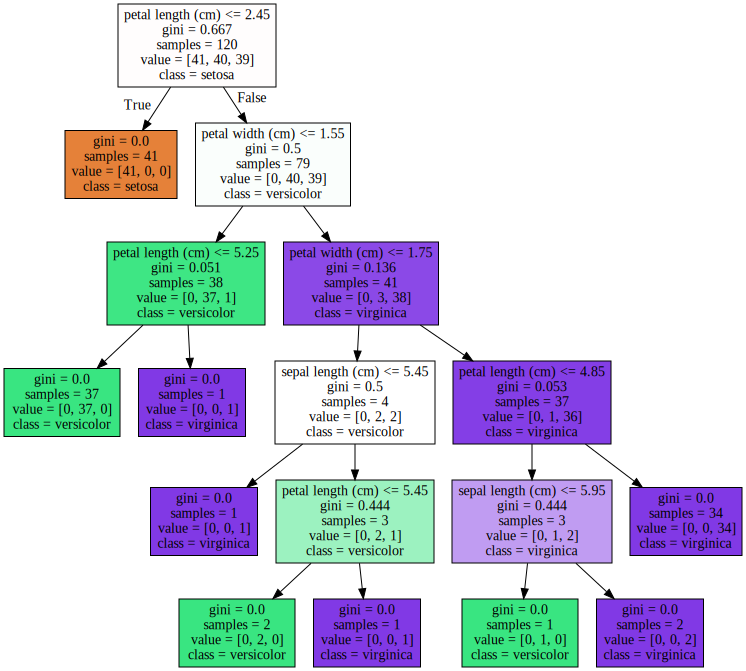

In [31]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [32]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [33]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
import seaborn as sns
import numpy as np

In [35]:
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print(f'{name} : {value}')

sepal length (cm) : 0.02500520941862888
sepal width (cm) : 0.0
petal length (cm) : 0.5549028149313102
petal width (cm) : 0.42009197565006084


<AxesSubplot:>

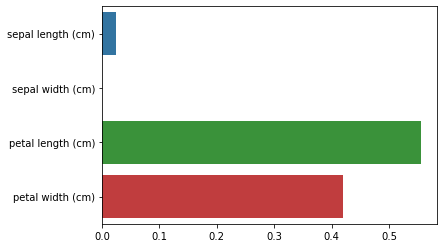

In [36]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정트리의 과적합

In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

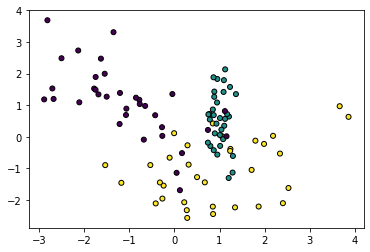

In [41]:
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [42]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

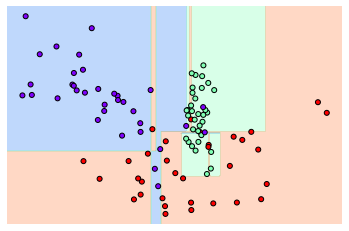

In [45]:
visualize_boundary(dt_clf,X_features,y_labels)

In [46]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels) #더 단순화 됨, min_samples_leaf의 값을 주어서 과적합방지

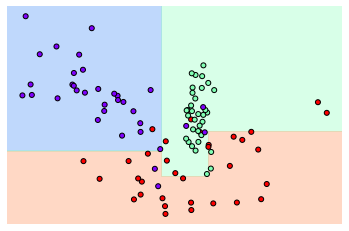

In [47]:
visualize_boundary(dt_clf,X_features,y_labels)